In [1]:
import pandas as pd #data manipulation and analysis
import numpy as np #data arrays
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #data visualisation

In [2]:
df = pd.read_csv('C:/Users/zaydm/Downloads/sample_transaction_data.csv')
df.head()

,transaction_id,user_id,account_id,transaction_timestamp,amount,currency,category
0,170a95df-cfb2-447e-bf7e-4dc6c3f8359a,56c72fe5-0590-4d01-a20f-6bfe5a9aaaf2,0cea3651-31b2-4f50-9baa-a5052716b361,2020-08-19 00:00:00,-26.95,GBP,other_general
1,e96b6614-be03-4dfe-9104-7d147df74ee0,75e80d46-902f-439c-b1e7-c530457400fe,0de94e02-be06-4d5a-ae04-dfae808cf059,2020-07-11 19:32:45,-11.57,GBP,convenience_stores
2,7e85e719-5377-4ed2-a3af-1e370bd92c01,56c72fe5-0590-4d01-a20f-6bfe5a9aaaf2,0cea3651-31b2-4f50-9baa-a5052716b361,2020-07-02 00:00:00,-35.00,GBP,other_general
3,910458ea-288e-4e2a-b881-9924f9b1e415,e38cbd04-b2d3-4c4d-8caf-95a7fef74af4,77960b18-b3ee-4bbd-895e-12f1b6deb88e,2020-05-01 10:21:32,100.00,GBP,other_finances
4,561840a9-f290-4ffd-952c-abb75ff59f5c,520fafb2-ca7b-44db-94d6-0b3686fbd1ad,56b9222f-7ab2-4b1a-b9b5-7196b9a9e6ea,2020-01-17 12:58:54,-0.90,GBP,supermarkets


In [3]:
#convert timestamps to datetime format for manipulation
df['transaction_timestamp'] = pd.to_datetime(df['transaction_timestamp'])

# New month column, 3 letter months 
df['month'] = df['transaction_timestamp'].dt.month_name().str.slice(stop=3)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

# month column as categorical format = they output in chronological order
df['month'] = pd.Categorical(df['month'], categories = months)

df.head(1)

,transaction_id,user_id,account_id,transaction_timestamp,amount,currency,category,month
0,170a95df-cfb2-447e-bf7e-4dc6c3f8359a,56c72fe5-0590-4d01-a20f-6bfe5a9aaaf2,0cea3651-31b2-4f50-9baa-a5052716b361,2020-08-19,-26.95,GBP,other_general,Aug


In [4]:
df.nunique()

transaction_id           16131
user_id                     20
account_id                  79
transaction_timestamp     5664
amount                    4462
currency                     1
category                    82
month                        9
dtype: int64

### 1) What is the average number of accounts per user?

In [5]:
#unique count account ids (79) divided by unique count of user_ids (20)
acc_id_count = df['account_id'].nunique()
user_id_count = df['user_id'].nunique()
acc_id_count/user_id_count

3.95

### 2) Averages can sometimes be misleading, can you plot the distribution of the number of accounts across users?

In [6]:
#Groupby user id and then show unique count of account id for each user, 
unique_user_id = df.groupby('user_id')
account_distribution_chart = unique_user_id['account_id'].nunique().reset_index()

#rename column
account_distribution_chart.rename(columns = {'account_id': 'count_of_account_id'}, inplace=True)
account_distribution_chart

,user_id,count_of_account_id
0,00190202-9539-4df9-8b7e-3461ccabe31c,5
1,04484b98-1dc3-4c87-ae33-fd477a00c2c8,6
2,09519500-db18-4bee-a6fd-01aa5c7f6cd7,6
3,14003899-10e9-4765-808b-591b78919168,4
4,1a1b9688-9d63-4326-983e-51e3d394958b,6
5,1ff9808d-094d-4069-aed1-51ac3c242abd,4
6,2e056705-0b72-4906-bef0-e58f0c999a8d,3
7,3ba1a146-5abf-4858-bb61-0ee0651cac03,4
8,4203dbe0-2075-4fd5-b81b-e376ea3d8477,4
9,520fafb2-ca7b-44db-94d6-0b3686fbd1ad,1


Text(0.5, 1.0, 'Distribution of accounts across users')

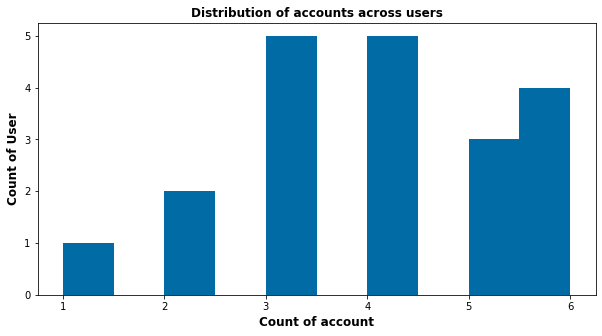

In [7]:
#Question 2 cont
plt.style.use('tableau-colorblind10')
plt.figure (figsize=(10,5))
account_distribution_chart['count_of_account_id'].plot(kind='hist')
plt.ylabel('Count of User', fontsize = 12,weight = 'semibold' )
plt.xlabel('Count of account', fontsize = 12, weight = 'semibold')
plt.title('Distribution of accounts across users', weight = 'semibold')

### 3) What are the top 3 categories that had the highest number of transactions (excluding `transfers_in`, `transfers_out` and `other_general`)?

In [8]:
# Count highest number of transactions in each category and sort by largest (nlargest = 6 since we drop 3 categories to then get top 3)
# Then drop the categories we don't want to include
df[['category']].value_counts().nlargest(6).drop(['transfers_out','transfers_in', 'other_general'])

c:\Users\zaydm\miniconda3\envs\crypto_env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


category        
supermarkets        1578
other_finances       817
other_eating_out     785
dtype: int64

### 4) For each user, extract the top 3 categories by amount spent

We would like the output to be a dictionary, with the user_id as the key, i.e. \
{user_1: ['mortgage_and_rent', 'shopping', 'sit_down_restaurants'], user_2: ['...', '...', '...'], ...}}

In [9]:
#Spendings are outflows from the account, thus we want the negative values 
spendings = (df['amount'] < 0)
df2 = df.loc[spendings]
df2

,transaction_id,user_id,account_id,transaction_timestamp,amount,currency,category,month
0,170a95df-cfb2-447e-bf7e-4dc6c3f8359a,56c72fe5-0590-4d01-a20f-6bfe5a9aaaf2,0cea3651-31b2-4f50-9baa-a5052716b361,2020-08-19 00:00:00,-26.95,GBP,other_general,Aug
1,e96b6614-be03-4dfe-9104-7d147df74ee0,75e80d46-902f-439c-b1e7-c530457400fe,0de94e02-be06-4d5a-ae04-dfae808cf059,2020-07-11 19:32:45,-11.57,GBP,convenience_stores,Jul
2,7e85e719-5377-4ed2-a3af-1e370bd92c01,56c72fe5-0590-4d01-a20f-6bfe5a9aaaf2,0cea3651-31b2-4f50-9baa-a5052716b361,2020-07-02 00:00:00,-35.00,GBP,other_general,Jul
4,561840a9-f290-4ffd-952c-abb75ff59f5c,520fafb2-ca7b-44db-94d6-0b3686fbd1ad,56b9222f-7ab2-4b1a-b9b5-7196b9a9e6ea,2020-01-17 12:58:54,-0.90,GBP,supermarkets,Jan
5,a403f405-37f5-4bfa-aec1-ea9f48ce8bd9,66dc5220-47ba-4ba1-8899-985152fe93e3,b248e65c-964f-4619-8938-00054e4cbe38,2020-09-14 00:00:00,-12.00,GBP,other_eating_out,Sep
...,...,...,...,...,...,...,...,...
16125,5edef537-1130-4941-99f8-dbd3b00453de,66dc5220-47ba-4ba1-8899-985152fe93e3,b248e65c-964f-4619-8938-00054e4cbe38,2020-04-07 00:00:00,-6.97,GBP,general_banking,Apr
16126,39550613-a434-4653-9858-b63ce89f3268,e38cbd04-b2d3-4c4d-8caf-95a7fef74af4,77960b18-b3ee-4bbd-895e-12f1b6deb88e,2020-07-19 19:48:21,-800.00,GBP,other_bills,Jul
16127,c5613070-4664-40e0-af1f-69b06711acda,2e056705-0b72-4906-bef0-e58f0c999a8d,5db242a7-6435-4237-8414-f11b08a86bf8,2020-06-11 00:00:00,-0.25,GBP,other_general,Jun
16128,3d7f96bc-52b0-4b6c-bf66-f7492790361b,66dc5220-47ba-4ba1-8899-985152fe93e3,b248e65c-964f-4619-8938-00054e4cbe38,2020-05-11 00:00:00,-18.00,GBP,general_banking,May


In [10]:
# Apply groupby to user id and category and then use the groupby on amounts. 
# Follow with 2nd groupby on user Id to ensure the nsmallest is applied user by user rather than the entirety of df2 (which would give just 3 results)
top_three_spend = df2.groupby(['user_id','category'], as_index=False)['amount'].sum().groupby('user_id').apply(lambda x: x.nsmallest(3,'amount'))

#some tidy up to get to what we need
top_three_spend = top_three_spend.droplevel(0)
top_three_spend= top_three_spend.reset_index().drop(columns={'index','amount'})

In [11]:
#set user_id as the index and sort
top_three_spend = top_three_spend.set_index(['user_id']).sort_index()

In [12]:
#import default dict so we dont have initialise dictionary with empty list 
from collections import defaultdict

my_dict =defaultdict(list)

#for loop applies categories into the lists on all of the user ids
for i,row in top_three_spend.iterrows():
    
    my_dict[row.name].append(row.category)

In [13]:
#dictionary output with key as user id 
my_dict
#END of Question 4

defaultdict(list,
            {'00190202-9539-4df9-8b7e-3461ccabe31c': ['transfers_out',
              'credit_cards',
              'other_general'],
             '04484b98-1dc3-4c87-ae33-fd477a00c2c8': ['credit_cards',
              'mortgage_and_rent',
              'transfers_out'],
             '09519500-db18-4bee-a6fd-01aa5c7f6cd7': ['transfers_out',
              'other_finances',
              'other_general'],
             '14003899-10e9-4765-808b-591b78919168': ['transfers_out',
              'mortgage_and_rent',
              'other_general'],
             '1a1b9688-9d63-4326-983e-51e3d394958b': ['general_banking',
              'other_finances',
              'credit_cards'],
             '1ff9808d-094d-4069-aed1-51ac3c242abd': ['credit_cards',
              'other_bills',
              'other_finances'],
             '2e056705-0b72-4906-bef0-e58f0c999a8d': ['credit_cards',
              'mortgage_and_rent',
              'other_bills'],
             '3ba1a146-5abf-4858-bb6

### 5) Calculate the net cash flow (sum of `amount`) for each user in each calendar month

In [14]:
# Groupby user_id and the month column we created earlier
month_user_id = df.groupby(['user_id', 'month'])

#sum the amounts in each group and then reset index to create dataframe
month_cf = month_user_id['amount'].sum().reset_index()

#pivot to make it easier to view and months pivot onto the x axis 
month_cf_clean = month_cf.pivot(index='user_id', columns = 'month', values= 'amount')
month_cf_clean

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
user_id,,,,,,,,,
00190202-9539-4df9-8b7e-3461ccabe31c,453.82,-75.69,4332.94,876.47,1859.21,-1996.82,408.19,-3084.32,-78.87
04484b98-1dc3-4c87-ae33-fd477a00c2c8,-5001.88,-229.96,-2245.29,2083.84,1858.87,2211.17,-65.19,609.79,3435.58
09519500-db18-4bee-a6fd-01aa5c7f6cd7,-1991.11,-533.00,2263.21,5129.45,921.14,1067.82,2449.28,2337.57,-1826.77
14003899-10e9-4765-808b-591b78919168,-1298.07,3425.93,2489.36,-1034.76,2417.21,3112.71,-8654.27,3263.64,-2484.64
1a1b9688-9d63-4326-983e-51e3d394958b,-9969.09,-732.51,6730.09,10583.09,-6216.87,-3783.49,4367.95,-2415.82,3954.26
1ff9808d-094d-4069-aed1-51ac3c242abd,208.74,1879.96,-694.62,-872.87,586.33,-20.34,-819.82,-1741.43,587.61
2e056705-0b72-4906-bef0-e58f0c999a8d,15219.97,-4233.14,3548.17,3059.22,1474.76,1330.75,18185.17,-2006.55,495.94
3ba1a146-5abf-4858-bb61-0ee0651cac03,-847.65,1572.63,1266.79,-2100.96,-9.92,-77.36,10.12,-199.39,-1655.09
4203dbe0-2075-4fd5-b81b-e376ea3d8477,525.09,2090.94,-454.02,550.85,984.16,106.56,-2989.40,-103.90,2663.73


### 6) Find the user whose has a positive monthly net cashflow every month, and plot their monthly net cashflows on a graph

In [15]:
# cf = cash flow 
# We want users where amount is greater than 0 (positive cash flow) and thus we carry out a count by month where amount is greater than 0
num_pos_month_cf = month_cf[month_cf['amount'] > 0].groupby('user_id').count()['month'] 

#If cash flow is positive for all 9 months we keep this row and drop the rest since they output as NaN
client_with_all_pos_cf = num_pos_month_cf.where(num_pos_month_cf == 9).dropna().index 

In [16]:
#we use loc on the filter we've just created to show cf where all 9 months are positive
month_cf_clean.loc[client_with_all_pos_cf]

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
user_id,,,,,,,,,
cf656f17-c9ee-4f0a-90bf-b679291ea2fe,804.65,1324.98,2331.41,2065.46,2224.57,2922.57,2697.32,313.39,847.87


In [17]:
# A different way to do question 6 in a less code method
# We want positive cashflow in every single month and thus each net value needs to be greater than 0
always_positive_cf = month_cf_clean.query('Jan > 0 and Feb > 0 and Mar > 0 and Apr > 0 and May > 0 and Jun >0 and Jul > 0 and Aug > 0 and Sep > 0')

#wide form data
always_positive_cf

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
user_id,,,,,,,,,
cf656f17-c9ee-4f0a-90bf-b679291ea2fe,804.65,1324.98,2331.41,2065.46,2224.57,2922.57,2697.32,313.39,847.87


(0.0, 3000.0)

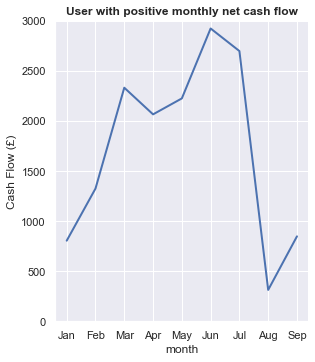

In [18]:
#Question 6 cont
always_positive_cf = always_positive_cf.T

# Visualise using seaborn, using relplot since no specific x and y values as we would when using sns.lineplot
sns.set_theme(style='darkgrid')
ax = sns.relplot(data = always_positive_cf, kind='line', lw = 2)

#remove legend since only one user + other formatting
ax.legend.remove()
plt.ylabel('Cash Flow (£)')
plt.title('User with positive monthly net cash flow', weight = 'semibold')
plt.ylim(0, 3000)

### 7) Pick a category and visualise the trend over time

In [19]:
#Plotting a category trend
trends = df.groupby(['user_id', 'category','month'])['amount'].sum().reset_index()

In [20]:
#Filter category by trend
trend_plot = trends.query("category =='gym_and_fitness'").reset_index(drop=True)
trend_plot.head()

,user_id,category,month,amount
0,00190202-9539-4df9-8b7e-3461ccabe31c,gym_and_fitness,Jan,-32.5
1,00190202-9539-4df9-8b7e-3461ccabe31c,gym_and_fitness,Feb,-32.5
2,00190202-9539-4df9-8b7e-3461ccabe31c,gym_and_fitness,Mar,-32.5
3,00190202-9539-4df9-8b7e-3461ccabe31c,gym_and_fitness,Apr,0.0
4,00190202-9539-4df9-8b7e-3461ccabe31c,gym_and_fitness,May,0.0


In [21]:
#absolute value since we want to plot positives on the graph for clean visualisation
trend_plot['amount'] = trend_plot['amount'].abs()

In [22]:
#interactive px line graph
fig = px.line(x= 'month', y= 'amount', color='user_id' , data_frame= trend_plot, title='Monthly Spending on Gym & Fitness by User',  
labels = dict(amount='Spending (£)', month='Month', user_id='User ID'))

fig.show()

### 8) What else can you tell us that's interesting about this dataset?

7 users did not spending anything on gym and fitness
The general trend shows that the first few months of the year a large amount of the spending, as we reached April all but one user stopped all spending. This could be due to people having New Years resolutions and then giving up on them. between mid spring and early summer there was no spending. AS we reached pass mid summer, spending increased perhaps to prepare for the summer holidays whilst once again dipping to near 0 for all users in late summer. 

In [23]:
#Question 8 cont
#groupby category and month and output some numpy stats
income_trend = df.groupby(['category','month'])['amount'].agg([len,np.sum,np.mean,np.median,np.min,np.max]).reset_index()
income_trend

,category,month,len,sum,mean,median,amin,amax
0,accommodation,Jan,7.0,-500.15,-71.450000,-29.990,-152.13,20.00
1,accommodation,Feb,6.0,-707.40,-117.900000,-41.530,-408.00,-12.85
2,accommodation,Mar,13.0,-584.56,-44.966154,-25.500,-189.21,85.04
3,accommodation,Apr,4.0,-99.14,-24.785000,-20.675,-44.80,-12.99
4,accommodation,May,4.0,-161.74,-40.435000,-44.635,-56.97,-15.50
...,...,...,...,...,...,...,...,...
733,vehicle_hire,May,NaN,0.00,NaN,NaN,NaN,NaN
734,vehicle_hire,Jun,NaN,0.00,NaN,NaN,NaN,NaN
735,vehicle_hire,Jul,8.0,-619.69,-77.461250,-22.500,-322.85,30.00
736,vehicle_hire,Aug,7.0,-698.42,-99.774286,-128.280,-346.15,200.00


In [24]:
#filter for income
income_trend_plot = income_trend.query("category =='income'").reset_index(drop=True)
income_trend_plot

,category,month,len,sum,mean,median,amin,amax
0,income,Jan,16.0,52687.98,3292.998750,3344.390,1080.00,5884.98
1,income,Feb,15.0,49051.26,3270.084000,3313.260,1260.00,5884.98
2,income,Mar,16.0,55027.16,3439.197500,3579.600,1304.94,5884.98
3,income,Apr,18.0,57468.96,3192.720000,3306.625,927.62,5333.74
4,income,May,18.0,61093.82,3394.101111,3608.345,431.40,5500.00
5,income,Jun,16.0,56064.77,3504.048125,3608.145,1140.00,6500.00
6,income,Jul,16.0,55953.55,3497.096875,3520.515,1313.83,7000.00
7,income,Aug,15.0,51395.27,3426.351333,3212.420,1113.48,7000.00
8,income,Sep,13.0,44910.65,3454.665385,3829.010,1053.74,5541.60


Text(0.5, 1.0, 'Average & Median income across the months')

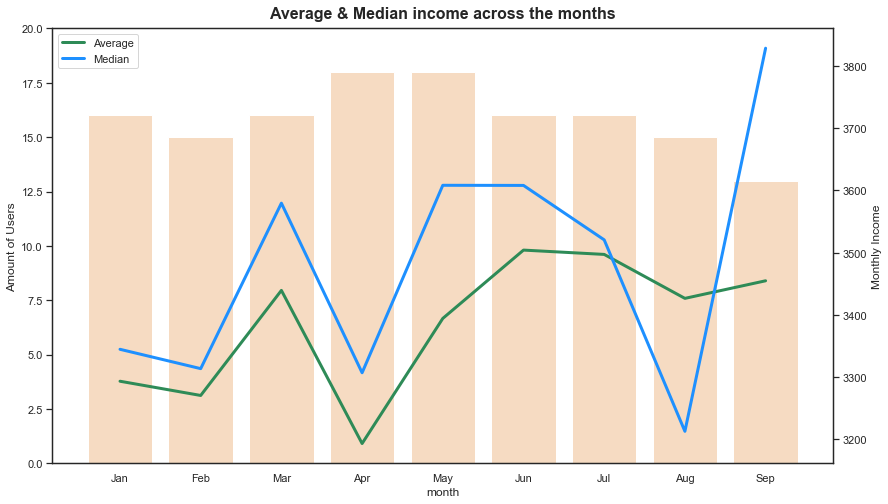

In [25]:
#theme and sizing
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(14,8))

#bar chart
ax = sns.barplot(x= 'month', y= 'len',  data = income_trend_plot, color= 'peachpuff')
ax.set_ylabel('Amount of Users')

#secondary axis
ax2  =  ax.twinx()
ax.set_ylim(0, 20)

#line graphs
palette_two = sns.color_palette('Paired')
ax = sns.lineplot(x= 'month', y= 'mean',  data = income_trend_plot, color='seagreen', lw = 3 )
ax2 = sns.lineplot(x= 'month', y= 'median',  data = income_trend_plot, color='dodgerblue', lw = 3 )

#formatting
plt.legend(labels=['Average', 'Median'])
plt.xlabel('Month')
plt.ylabel('Monthly Income')
plt.title('Average & Median income across the months', weight = 'semibold', fontsize = 16, pad= 10)

Assumptions : 
  1. Income = Money received in a salaried worker's bank account (Does not include any investment/interest earnings)
  2. Income is in GBP so we assume that this monthly salary is for those living/ have employment in *London*
  3. This is average is for the data given and does not represent London/ UK average 
  4. Net Income since its arriving into their bank account and we've already said they live/ work in London
  5. For context assume individual lives alone with no partner or roommate in 

- With an average of 16 users receiving income each month, we have an average monthly income of £3.4k
- Median income is lower then average for all but one month, this is due a max monthly earning by an individual of £7000 (skews the average)

Context:
- To put these values in context an average £3.4k pcm is equal to approximately £60k gross salary per annum (assume no student loans)
- London average for studio apartment:
  - £1500 pcm
  - £90 council tax (with 25% single person discount)
  - £200 for utilies, broadband, parking 
  - £400 groceries
  - £200 Miscallaneous
- Total Costs: £2450
- **£950** left for entertainment, investment/savings and more

For the future breaking the spending habits down individually could give a good indication of where costs can be saved/ cut and how an individual could better utilise their income.

END